In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train,y_train), (X_test, y_test) = mnist.load_data()

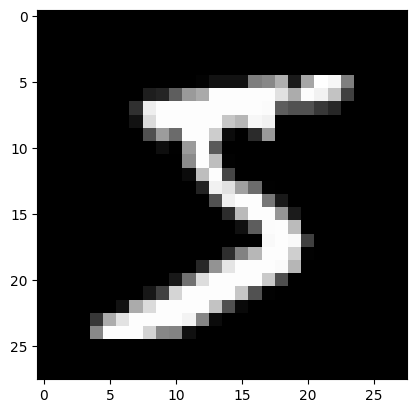

In [ ]:
# Visual Representation of data
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.show()

In [ ]:
# Limiting the range of values between 0 and 1
X_train = X_train/255
X_test = X_test/255

In [ ]:
import keras_tuner as kt

In [ ]:
# Building a Tuned model for the above dataset
def build_model(hp):

  model = Sequential()

  counter = 0 # To make sure that input layer is initialized seperately

  for i in range(
      hp.Int(
          'num_layers',
          min_value = 1,
          max_value = 3)):

    if counter == 0:
      model.add(Flatten(input_shape = (28,28))) #  To provide a 1-D data since its 2-D by default

    else:# Here we are making hidden layers as per the loop limit
      model.add(Dense
       (units = hp.Int(
                      'units_' + str(i),
                       min_value = 100,
                       max_value = 128),
        activation = hp.Choice(
            'activation' + str(i),
            values =['relu', 'tanh'])))
    counter += 1

  model.add(Dense(10, activation = 'softmax'))# Since we are doing multi-classification we used Softmax as our activation function

  model.compile(optimizer = hp.Choice('optimizer', values = ['rmsprop', 'adam', 'sgd', 'adadelta', 'nadam', 'adagrad']), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

  return model

In [ ]:
#Initializing the Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='mnist',
    project_name='mnist'
    )


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
tuner.search(
    X_train, y_train,
    epochs = 5,
    validation_data = (X_test, y_test),
    verbose = 1)

Trial 5 Complete [00h 00m 50s]
val_accuracy: 0.9459999799728394

Best val_accuracy So Far: 0.9763000011444092
Total elapsed time: 00h 03m 47s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 2,
 'optimizer': 'adam',
 'units_1': 116,
 'activation1': 'relu',
 'units_2': 118,
 'activation2': 'relu'}

In [ ]:
model = tuner.get_best_models(num_models = 1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
callback = EarlyStopping(monitor = 'val_loss',
                         patience = 5,
                         min_delta = 0.0001,
                         mode = 'auto',
                         baseline = None,
                         restore_best_weights = True)

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, initial_epoch = 5,callbacks = callback,  validation_data = (X_test, y_test))

Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9876 - loss: 0.0388 - val_accuracy: 0.9770 - val_loss: 0.0771
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9912 - loss: 0.0295 - val_accuracy: 0.9742 - val_loss: 0.0867
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9921 - loss: 0.0255 - val_accuracy: 0.9794 - val_loss: 0.0768
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9947 - loss: 0.0184 - val_accuracy: 0.9761 - val_loss: 0.0853
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9957 - loss: 0.0160 - val_accuracy: 0.9774 - val_loss: 0.0836


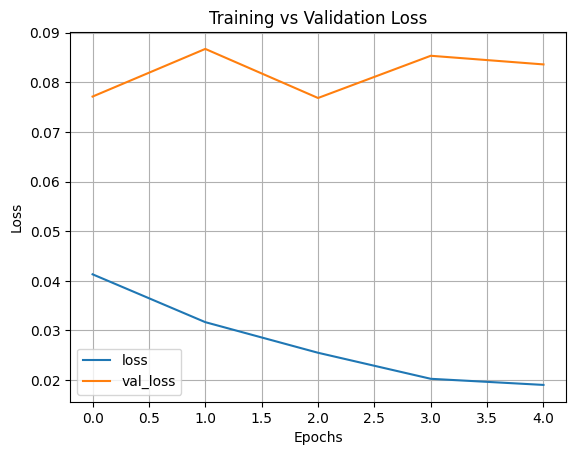

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

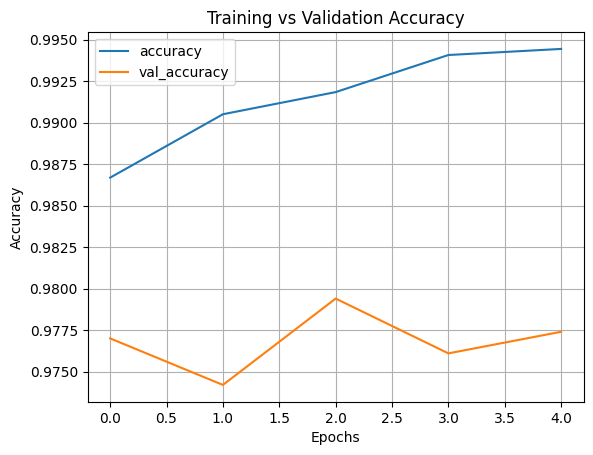

In [ ]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

*   **Name** - Shabd Pathak
*   Btech.CSE - JUET, Guna
